# Customer satisfaction prediction using Multivariate Linear Regression

The Walmart data set contains 200 entries of customer experience. This was collected by a survey.

In this data, we need to find out:\
First, What are the variables on which customer satisfaction depends?\
Secondly, Using those dependent variables, we need to build a regression model using some training data and validate the same for testing data. This model will used for predicting customer satisfaction.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

#pip install sas7bdat
import sas7bdat
from sas7bdat import *

from sklearn.model_selection import train_test_split

#pip install --upgrade patsy
#pip install statsmodels
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
#from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy import stats
import scipy.stats as stats

In [5]:
# Reading dataset and creating dataframe
file=SAS7BDAT('walmart.sas7bdat')
file
df=file.to_data_frame()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
Customer_Satisfaction    200 non-null float64
Product_Quality          200 non-null float64
E_Commerce               200 non-null float64
Technical_Support        200 non-null float64
Complaint_Resolution     200 non-null float64
Advertising              200 non-null float64
Product_Line             200 non-null float64
Salesforce_Image         200 non-null float64
Competitive_Pricing      200 non-null float64
Warranty_Claims          200 non-null float64
Packaging                200 non-null float64
Order_Billing            200 non-null float64
Price_Flexibility        200 non-null float64
Delivery_Speed           200 non-null float64
dtypes: float64(14)
memory usage: 22.0 KB


In [6]:
# Check dimension of the dataset
df.shape

(200, 14)

In [8]:

# Check descriptive stats of each column
m=df.describe()
m

,Customer_Satisfaction,Product_Quality,E_Commerce,Technical_Support,Complaint_Resolution,Advertising,Product_Line,Salesforce_Image,Competitive_Pricing,Warranty_Claims,Packaging,Order_Billing,Price_Flexibility,Delivery_Speed
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.952000,7.894000,3.765000,5.243000,5.367500,4.06150,5.815000,5.248000,6.971000,6.048500,5.210500,4.242000,4.464000,3.816000
std,1.241128,1.383014,0.768916,1.655189,1.209964,1.14706,1.317404,1.128567,1.581253,0.875345,1.496005,0.911918,1.192651,0.749368
min,4.700000,5.000000,2.200000,0.400000,1.500000,1.50000,2.300000,2.500000,3.700000,3.700000,1.200000,1.200000,2.300000,1.600000
25%,6.000000,6.700000,3.300000,4.100000,4.500000,3.20000,4.800000,4.575000,5.800000,5.400000,4.200000,3.700000,3.575000,3.300000
50%,7.050000,8.050000,3.700000,5.300000,5.400000,4.00000,5.700000,5.000000,7.150000,6.100000,5.200000,4.300000,4.250000,3.900000
75%,7.900000,9.100000,4.100000,6.425000,6.200000,4.92500,6.900000,6.000000,8.325000,6.600000,6.225000,4.700000,5.325000,4.325000
max,9.900000,10.000000,5.700000,8.900000,8.700000,6.90000,8.400000,8.200000,10.000000,8.400000,9.500000,6.700000,7.500000,5.500000


In [9]:
# Now creating training and testing dataset from orginal walmart dataset
# 80% for training & 20% for model validation
train,test=train_test_split(df,test_size=0.2,random_state=2)

In [10]:

# this function tells the dimensions of the data frame
train.shape
test.shape

(40, 14)

In [12]:

# Seeing correlation with all variables
corr=df.corr()
corr

,Customer_Satisfaction,Product_Quality,E_Commerce,Technical_Support,Complaint_Resolution,Advertising,Product_Line,Salesforce_Image,Competitive_Pricing,Warranty_Claims,Packaging,Order_Billing,Price_Flexibility,Delivery_Speed
Customer_Satisfaction,1.000000,0.521052,0.341551,0.202572,0.597566,0.353541,0.646337,0.477870,-0.282063,0.269225,0.191509,0.540485,0.031824,0.630172
Product_Quality,0.521052,1.000000,-0.034316,0.086604,0.089551,-0.053901,0.509295,-0.116104,-0.448112,0.109202,0.135629,0.083037,-0.487213,0.066617
E_Commerce,0.341551,-0.034316,1.000000,0.040514,0.191758,0.505198,0.077115,0.788225,0.177294,0.103102,-0.041005,0.216890,0.186243,0.240808
Technical_Support,0.202572,0.086604,0.040514,1.000000,0.151878,0.027820,0.169338,0.085700,-0.091796,0.837819,-0.037768,0.120747,-0.029173,0.132369
Complaint_Resolution,0.597566,0.089551,0.191758,0.151878,1.000000,0.234220,0.568294,0.255656,-0.077267,0.180840,0.090359,0.741084,0.417718,0.878067
Advertising,0.353541,-0.053901,0.505198,0.027820,0.234220,1.000000,0.116673,0.626754,0.099175,0.035151,0.062728,0.230129,0.260075,0.323074
Product_Line,0.646337,0.509295,0.077115,0.169338,0.568294,0.116673,1.000000,0.050414,-0.482631,0.236551,0.126412,0.443524,-0.349225,0.611901
Salesforce_Image,0.477870,-0.116104,0.788225,0.085700,0.255656,0.626754,0.050414,1.000000,0.199981,0.162849,0.008659,0.283672,0.272187,0.298677
Competitive_Pricing,-0.282063,-0.448112,0.177294,-0.091796,-0.077267,0.099175,-0.482631,0.199981,1.000000,-0.085385,-0.121316,-0.060485,0.469746,-0.055161
Warranty_Claims,0.269225,0.109202,0.103102,0.837819,0.180840,0.035151,0.236551,0.162849,-0.085385,1.000000,0.030308,0.204171,-0.040725,0.182976


In [13]:
#y=f(x)

x_train=train.drop('Customer_Satisfaction',axis=1)
y_train=train['Customer_Satisfaction']
x_test=test.drop('Customer_Satisfaction',axis=1)
y_test=test['Customer_Satisfaction']

In [15]:
# creating first model with all variables: Ordinary Least Square(OLS) Technique used
model=ols('Customer_Satisfaction ~ Product_Quality + E_Commerce + Technical_Support + Complaint_Resolution + Advertising + Product_Line + Salesforce_Image + Competitive_Pricing + Warranty_Claims + Packaging + Order_Billing + Price_Flexibility + Delivery_Speed',
          data=train).fit()

# Check Model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer_Satisfaction   R-squared:                       0.815
Model:                               OLS   Adj. R-squared:                  0.798
Method:                    Least Squares   F-statistic:                     49.40
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):           8.97e-47
Time:                           22:06:03   Log-Likelihood:                -121.26
No. Observations:                    160   AIC:                             270.5
Df Residuals:                        146   BIC:                             313.6
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5659      0.869     -2.954      0.004      -4.283      -0.849
Product_Quality          0.4192      0.041     10.320      0.000       0.339       0.499
E_Commerce              -0.1916      0.094     -2.042      0.043      -0.377      -0.006
Technical_Support        0.0704      0.050      1.418      0.158      -0.028       0.168
Complaint_Resolution     0.1526      0.077      1.983      0.049       0.000       0.305
Advertising             -0.0137      0.051     -0.268      0.789      -0.115       0.087
Product_Line             0.4313      0.198      2.174      0.031       0.039       0.823
Salesforce_Image         0.5744      0.073      7.891      0.000       0.431       0.718
Competitive_Pricing     -0.0487      0.033     -1.465      0.145      -0.114       0.017
Warranty_Claims         -0.1027      0.095     -1.079      0.282      -0.291       0.085
Packaging                0.0787      0.031      2.525      0.013       0.017       0.140
Order_Billing            0.0580      0.080      0.727      0.469      -0.100       0.216
Price_Flexibility        0.3601      0.209      1.719      0.088      -0.054       0.774
Delivery_Speed          -0.2761      0.411     -0.672      0.503      -1.088       0.536
==============================================================================
Omnibus:                        7.871   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.878
Skew:                          -0.541   Prob(JB):                       0.0195
Kurtosis:                       3.111   Cond. No.                         433.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# checking the assumption of Linear regression
# Checking multicollinearity
C_df = add_constant(df)
X=C_df

g=[]
for i in range(X.shape[1]):
    g.append(variance_inflation_factor(X.values, i))
    
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
           index=X.columns)

C:\Users\Shrey Shah\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                    402.554783
Customer_Satisfaction      5.106591
Product_Quality            2.764920
E_Commerce                 2.875786
Technical_Support          3.559950
Complaint_Resolution       4.812274
Advertising                1.829654
Product_Line              37.873143
Salesforce_Image           5.347411
Competitive_Pricing        1.670724
Warranty_Claims            3.761154
Packaging                  1.101030
Order_Billing              2.757203
Price_Flexibility         33.081866
Delivery_Speed            48.712011
dtype: float64

In [17]:
#Removing variables with higher VIF values(i.e Productline, Price flexibility and Delivery Speed) )

X=C_df.drop(['Delivery_Speed','Product_Line'],axis=1)

model=ols('Customer_Satisfaction ~ Product_Quality + E_Commerce + Technical_Support + Complaint_Resolution + Advertising + Salesforce_Image + Competitive_Pricing + Warranty_Claims + Packaging + Order_Billing + Price_Flexibility',
          data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer_Satisfaction   R-squared:                       0.791
Model:                               OLS   Adj. R-squared:                  0.776
Method:                    Least Squares   F-statistic:                     50.95
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):           9.79e-45
Time:                           22:07:27   Log-Likelihood:                -130.89
No. Observations:                    160   AIC:                             285.8
Df Residuals:                        148   BIC:                             322.7
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.2793      0.632     -2.025      0.045      -2.528      -0.031
Product_Quality          0.4349      0.042     10.306      0.000       0.352       0.518
E_Commerce              -0.1557      0.098     -1.581      0.116      -0.350       0.039
Technical_Support        0.0622      0.052      1.189      0.236      -0.041       0.165
Complaint_Resolution     0.3486      0.060      5.788      0.000       0.230       0.468
Advertising              0.0326      0.053      0.620      0.536      -0.071       0.137
Salesforce_Image         0.5351      0.076      7.050      0.000       0.385       0.685
Competitive_Pricing     -0.0712      0.034     -2.068      0.040      -0.139      -0.003
Warranty_Claims         -0.0709      0.100     -0.709      0.480      -0.269       0.127
Packaging                0.0928      0.033      2.840      0.005       0.028       0.157
Order_Billing            0.1430      0.079      1.814      0.072      -0.013       0.299
Price_Flexibility        0.0107      0.060      0.178      0.859      -0.109       0.130
==============================================================================
Omnibus:                        5.062   Durbin-Watson:                   2.297
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                5.171
Skew:                          -0.421   Prob(JB):                       0.0754
Kurtosis:                       2.743   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Dropping variables whose p-values are greater than 5%
model=ols('Customer_Satisfaction ~ Product_Quality + E_Commerce + Technical_Support + Complaint_Resolution + Advertising + Salesforce_Image + Competitive_Pricing + Warranty_Claims + Packaging + Order_Billing + Price_Flexibility',
          data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer_Satisfaction   R-squared:                       0.791
Model:                               OLS   Adj. R-squared:                  0.776
Method:                    Least Squares   F-statistic:                     50.95
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):           9.79e-45
Time:                           22:07:39   Log-Likelihood:                -130.89
No. Observations:                    160   AIC:                             285.8
Df Residuals:                        148   BIC:                             322.7
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.2793      0.632     -2.025      0.045      -2.528      -0.031
Product_Quality          0.4349      0.042     10.306      0.000       0.352       0.518
E_Commerce              -0.1557      0.098     -1.581      0.116      -0.350       0.039
Technical_Support        0.0622      0.052      1.189      0.236      -0.041       0.165
Complaint_Resolution     0.3486      0.060      5.788      0.000       0.230       0.468
Advertising              0.0326      0.053      0.620      0.536      -0.071       0.137
Salesforce_Image         0.5351      0.076      7.050      0.000       0.385       0.685
Competitive_Pricing     -0.0712      0.034     -2.068      0.040      -0.139      -0.003
Warranty_Claims         -0.0709      0.100     -0.709      0.480      -0.269       0.127
Packaging                0.0928      0.033      2.840      0.005       0.028       0.157
Order_Billing            0.1430      0.079      1.814      0.072      -0.013       0.299
Price_Flexibility        0.0107      0.060      0.178      0.859      -0.109       0.130
==============================================================================
Omnibus:                        5.062   Durbin-Watson:                   2.297
Prob(Omnibus):                  0.080   Jarque-Bera (JB):                5.171
Skew:                          -0.421   Prob(JB):                       0.0754
Kurtosis:                       2.743   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model=ols('Customer_Satisfaction ~ Product_Quality + E_Commerce + Technical_Support + Complaint_Resolution + Advertising + Salesforce_Image + Competitive_Pricing + Warranty_Claims + Packaging + Order_Billing',
          data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer_Satisfaction   R-squared:                       0.791
Model:                               OLS   Adj. R-squared:                  0.777
Method:                    Least Squares   F-statistic:                     56.40
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):           1.29e-45
Time:                           22:07:48   Log-Likelihood:                -130.91
No. Observations:                    160   AIC:                             283.8
Df Residuals:                        149   BIC:                             317.6
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.2514      0.610     -2.052      0.042      -2.456      -0.046
Product_Quality          0.4313      0.037     11.775      0.000       0.359       0.504
E_Commerce              -0.1553      0.098     -1.583      0.116      -0.349       0.039
Technical_Support        0.0619      0.052      1.189      0.236      -0.041       0.165
Complaint_Resolution     0.3518      0.057      6.144      0.000       0.239       0.465
Advertising              0.0338      0.052      0.650      0.517      -0.069       0.137
Salesforce_Image         0.5346      0.076      7.071      0.000       0.385       0.684
Competitive_Pricing     -0.0691      0.032     -2.147      0.033      -0.133      -0.006
Warranty_Claims         -0.0713      0.100     -0.715      0.476      -0.268       0.126
Packaging                0.0935      0.032      2.890      0.004       0.030       0.157
Order_Billing            0.1461      0.077      1.907      0.058      -0.005       0.297
==============================================================================
Omnibus:                        5.100   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                5.204
Skew:                          -0.420   Prob(JB):                       0.0741
Kurtosis:                       2.729   Cond. No.                         241.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model=ols('Customer_Satisfaction ~ Product_Quality + E_Commerce + Technical_Support + Complaint_Resolution + Advertising + Salesforce_Image + Competitive_Pricing + Packaging + Order_Billing',
          data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer_Satisfaction   R-squared:                       0.790
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     62.82
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):           2.02e-46
Time:                           22:07:55   Log-Likelihood:                -131.18
No. Observations:                    160   AIC:                             282.4
Df Residuals:                        150   BIC:                             313.1
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.4611      0.534     -2.737      0.007      -2.516      -0.406
Product_Quality          0.4306      0.037     11.779      0.000       0.358       0.503
E_Commerce              -0.1566      0.098     -1.599      0.112      -0.350       0.037
Technical_Support        0.0300      0.027      1.117      0.266      -0.023       0.083
Complaint_Resolution     0.3550      0.057      6.230      0.000       0.242       0.468
Advertising              0.0400      0.051      0.780      0.437      -0.061       0.141
Salesforce_Image         0.5278      0.075      7.049      0.000       0.380       0.676
Competitive_Pricing     -0.0699      0.032     -2.176      0.031      -0.133      -0.006
Packaging                0.0899      0.032      2.817      0.005       0.027       0.153
Order_Billing            0.1402      0.076      1.844      0.067      -0.010       0.291
==============================================================================
Omnibus:                        4.688   Durbin-Watson:                   2.285
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.765
Skew:                          -0.399   Prob(JB):                       0.0923
Kurtosis:                       2.722   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model=ols('Customer_Satisfaction ~ Product_Quality + E_Commerce +  Complaint_Resolution +  Salesforce_Image + Competitive_Pricing + Packaging + Order_Billing',
          data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer_Satisfaction   R-squared:                       0.788
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     80.65
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):           5.89e-48
Time:                           22:08:09   Log-Likelihood:                -132.11
No. Observations:                    160   AIC:                             280.2
Df Residuals:                        152   BIC:                             304.8
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.3649      0.523     -2.608      0.010      -2.399      -0.331
Product_Quality          0.4357      0.036     12.003      0.000       0.364       0.507
E_Commerce              -0.1681      0.097     -1.726      0.086      -0.360       0.024
Complaint_Resolution     0.3657      0.056      6.489      0.000       0.254       0.477
Salesforce_Image         0.5634      0.066      8.503      0.000       0.432       0.694
Competitive_Pricing     -0.0721      0.032     -2.256      0.025      -0.135      -0.009
Packaging                0.0900      0.032      2.831      0.005       0.027       0.153
Order_Billing            0.1396      0.076      1.837      0.068      -0.011       0.290
==============================================================================
Omnibus:                        5.178   Durbin-Watson:                   2.266
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                5.167
Skew:                          -0.404   Prob(JB):                       0.0755
Kurtosis:                       2.649   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model=ols('Customer_Satisfaction ~ Product_Quality +  Complaint_Resolution +  Salesforce_Image + Competitive_Pricing + Packaging ',
          data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer_Satisfaction   R-squared:                       0.779
Model:                               OLS   Adj. R-squared:                  0.772
Method:                    Least Squares   F-statistic:                     108.8
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):           1.05e-48
Time:                           22:08:17   Log-Likelihood:                -135.27
No. Observations:                    160   AIC:                             282.5
Df Residuals:                        154   BIC:                             301.0
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.3794      0.524     -2.630      0.009      -2.415      -0.343
Product_Quality          0.4279      0.036     11.733      0.000       0.356       0.500
Complaint_Resolution     0.4400      0.039     11.320      0.000       0.363       0.517
Salesforce_Image         0.4926      0.044     11.238      0.000       0.406       0.579
Competitive_Pricing     -0.0790      0.032     -2.449      0.015      -0.143      -0.015
Packaging                0.1004      0.032      3.146      0.002       0.037       0.163
==============================================================================
Omnibus:                        4.285   Durbin-Watson:                   2.289
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                4.354
Skew:                          -0.382   Prob(JB):                        0.113
Kurtosis:                       2.737   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model=ols('Customer_Satisfaction ~ Product_Quality + Product_Line + Complaint_Resolution +  Salesforce_Image  + Packaging ',
          data=train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer_Satisfaction   R-squared:                       0.790
Model:                               OLS   Adj. R-squared:                  0.784
Method:                    Least Squares   F-statistic:                     116.1
Date:                   Sun, 08 Mar 2020   Prob (F-statistic):           2.10e-50
Time:                           22:08:25   Log-Likelihood:                -131.17
No. Observations:                    160   AIC:                             274.3
Df Residuals:                        154   BIC:                             292.8
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.0660      0.399     -5.172      0.000      -2.855      -1.277
Product_Quality          0.3820      0.039      9.786      0.000       0.305       0.459
Product_Line             0.1936      0.051      3.794      0.000       0.093       0.294
Complaint_Resolution     0.3382      0.047      7.160      0.000       0.245       0.432
Salesforce_Image         0.4775      0.042     11.347      0.000       0.394       0.561
Packaging                0.1010      0.031      3.254      0.001       0.040       0.162
==============================================================================
Omnibus:                        3.478   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                3.475
Skew:                          -0.355   Prob(JB):                        0.176
Kurtosis:                       2.868   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# Check Residual
y_pred=model.predict(x_train)
residual = y_train-y_pred

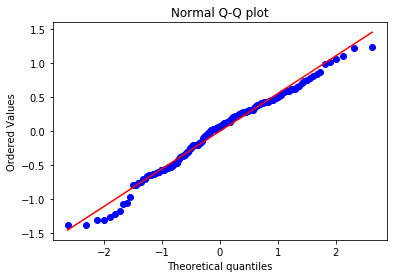

In [25]:
# Check normality of Residuals

stats.probplot(residual, dist="norm",plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

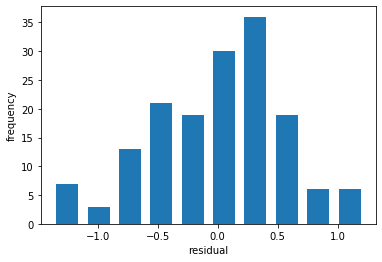

In [26]:
# 1. Checking normality of residuals
hist, bins = np.histogram(residual, bins=10)
hist
bins
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center,hist, align='center', width=width)
plt.ylabel('frequency')
plt.xlabel('residual')
plt.show()

In [27]:
# Shapiro-Wilk normality test
stats.shapiro(residual)
# (w, p-value)

(0.9824889898300171, 0.04049251601099968)

Text(0, 0.5, 'residual')

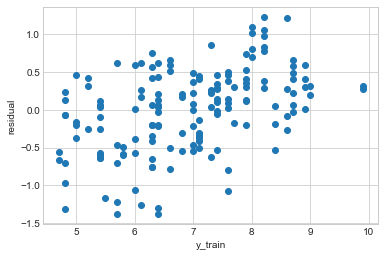

In [28]:
# 3. Checking Homoscedasticity
plt.style.use('seaborn-whitegrid')
plt.plot(y_train,residual,'o')
plt.xlabel('y_train')
plt.ylabel('residual')

In [29]:
## Breusch-Pagan Test
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
bp = statsmodels.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
bp
pd.DataFrame(name,bp)

,0
5.851426,Lagrange multiplier statistic
0.320945,p-value
1.169157,f-value
0.326878,f p-value


In [30]:
#H0: variance of residuals is const(homo condition), H1: var.of residuals not const(hetero)
#We see that the p-value is 0.28. This is higher than 0.05, so we can no longer reject the null hypothesis of homoscedasticity.
#In this regard, the Breusch-Pagan test has confirmed that our results are not influenced by heteroscedasticity and we are therefore reliable


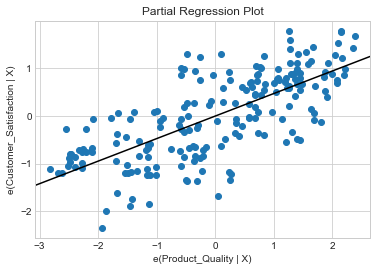

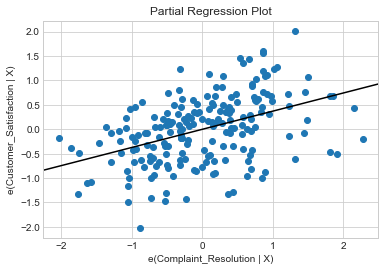

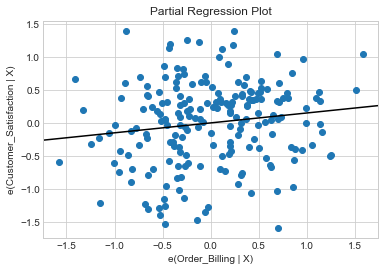

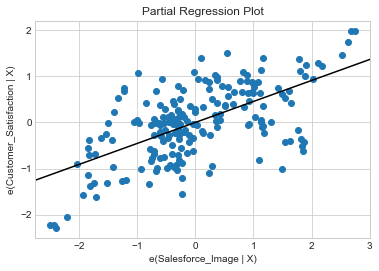

In [31]:
# checking linearity : Equivalent to crplots in R
fig=sm.graphics.plot_partregress('Customer_Satisfaction','Product_Quality',['Complaint_Resolution', 'Order_Billing','Salesforce_Image'],
                                 data=df,obs_labels=False)# Effect of ['Complaint_Resolution', 'Order_Billing','Salesforce_Image'] will be removed by OLS regression.

fig1=sm.graphics.plot_partregress('Customer_Satisfaction','Complaint_Resolution',['Product_Quality', 'Order_Billing','Salesforce_Image'],data=df,obs_labels=False)
fig2=sm.graphics.plot_partregress('Customer_Satisfaction','Order_Billing',['Product_Quality','Complaint_Resolution','Salesforce_Image'],data=df,obs_labels=False)
fig3=sm.graphics.plot_partregress('Customer_Satisfaction','Salesforce_Image',['Product_Quality','Complaint_Resolution','Order_Billing'],data=df,obs_labels=False)



Text(0, 0.5, 'Predictions')

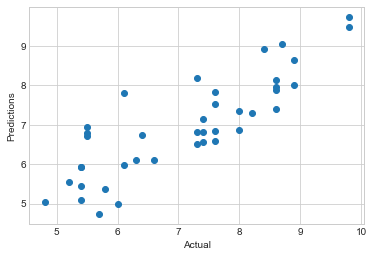

In [32]:
# Predicting the Test set results
y_pred=model.predict(x_test)

plt.plot(y_test,y_pred,'o')
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [44]:
#Model evaluation metrics for regression-------------------------

from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))#MAE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))#RMSE

accuracy = 1 - (0.7465290637171569/y_test.mean())
print('accuracy'+': ' +str(round(accuracy*100,2)) + '%')

0.6289553289168865
0.7465290637171564
accuracy: 89.51%


### The accuracy for the model is 89.51% on the test dataset, thus pretty accurate!